# Leapfrog Algorithm for a Simple Harmonic Oscillator
Import useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background') # you can comment out this line if you are not using a dark background

Define the ODE solvers. 

In [ ]:
def RK2(diffeq,dof,dt):
    """
    Runge-Kutta second order method for ODEs:
    Given the degrees of freedom at time t
    Returns the degrees of freedom at time t+dt
    NOTE: the diffeq function passed in input needs to return
    the derivative wrt time of each degree of freedom of the system
    """
    k1=dt*diffeq(dof)
    k2=dt*diffeq(dof+0.5*k1)
    return dof+k2

def leapfrog(diffeq,r,v,dt):
    """
    Leapfrog algorithm for Hamiltonian dynamics
    Given the position and velocity arrays at time t
    Returns the position and velocity arrays at time t+dt
    NOTE: the diffeq function passed in input needs to return 
        dr/dt for id=0
        dv/dt for id=1
    """
    r=r+diffeq(0,r,v)*dt/2.
    v=v+diffeq(1,r,v)*dt
    r=r+diffeq(0,r,v)*dt/2.
    return r, v

Assignment 1A: Define two alternative functions to describe a simple harmonic oscillator, one compatible with the RK solver and one for the leapfrog solver. You are already familiar with the requirements of the RK solver (a single numpy array with all the degrees of freedom of the system, positions first, velocities second). The leapfrog algorithm designed in the book has slightly different input/output: it uses an ID variable to check wether we are evaluating the righthandside of the differential equation for the position or for the velocity. It needs to return dr/dt (i.e. the velocity) for ID=0, while it needs to return dv/dt (i.e. the acceleration) for ID=1. 

In [24]:
def simple_harmonic_lf(id,r,v):
    """
    Return the righthandside of the differential equation 
    for a simple harmonic motion, for which F=-kr
    This function can be called by a leapfrog solver, for which 
    the differential eqautions for positions and velocities are decoupled
    When id=0 this function returns dr/dt (i.e. the velocity)
    when id=1 this function returns dv/dt (i.e. the acceleration)
    """
    if id == 0: return 
    return 

def simple_harmonic_rk(dof):
    """
    Return the righthandside of the differential equation 
    for a simple harmonic motion, for which F=-kr
    This function can be called by a RK solver, for which 
    all the 1st order differential equations are solved at the same time
    Assuming a 1D system, the degrees of freedom in input are 
    position (dof[0]) and velocity (dof[1]) 
    """
    ddofdt=np.zeros(dof.shape)
    ddofdt[0]=
    ddofdt[1]=
    return ddofdt

Specify the physical parameters of the system. For simplicity we will assume a system with an elastic constant of 1 N/m and a mass of 2 kg. 

In [4]:
kel=1. # let's assume these values are in SI units, so N/m
mass=2. # let's assume these values are in SI units, so Kg

Define to functions to compute the total energy of the simple harmonic oscillator from its degrees of freedom. You may want to implement two versions, depending on wether the degrees of freedom are passed using the leapfrog (two separate arrays for r and v) or the RK convention (a single array with position first and velocity second).

In [ ]:
def sho_energy_lf(r,v):
    """
    Compute the total energy of a simple harmonic oscillator 
    E = 1/2 m*v**2 + 1/2 k*r**2
    """
    return 

def sho_energy_rk(dof):
    """
    Compute the total energy of a simple harmonic oscillator 
    E = 1/2 m*dof[1]**2 + 1/2 k*dof[0]**2
    """
    return

Assignment 1B-1C: Run a simulation with the leapfrog and the RK algorithms. Store the trajectories in phase space (so both the position and the velocity of the object) to be able to plot them later. Store the total energy of the system to be able to check energy conservation.
Start a simulation out of equilibrium, say with x=1. and vx=0., but you can play with the parameters as much as you like.

In [44]:
xlf=[] # setup a container to store the position as a function of time
vlf=[] # setup a container to store the velocity as a function of time
elf=[] # setup a container to store the total energy as a function of time
#
nsteps=100 # theis is just a placeholder, you may want to change these values
dt=0.2 # this is just a placeholder, you may want to change these values
for i in range(nsteps):
    pos,vel=leapfrog(simple_harmonic_lf,pos,vel,dt)
    xlf.append()
    vlf.append()
    elf.append()

In [62]:
nsteps=10000
dt=0.2
xrk=[] # setup a container to store the position as a function of time
vrk=[] # setup a container to store the velocity as a function of time
erk=[] # setup a container to store the total energy as a function of time
for i in range(nsteps):
    dof=RK2(simple_harmonic_rk,dof,dt)
    xrk.append()
    vrk.append()
    erk.append()

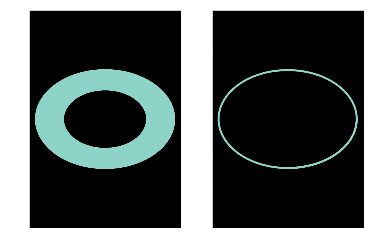

In [63]:
plt.subplot(121)
plt.plot(xrk,vrk)
plt.axis('equal')
plt.subplot(122)
plt.plot(xlf,vlf)
plt.axis('equal')
plt.show()